<a href="https://colab.research.google.com/github/akshaypat444/pytorch_experiments/blob/main/make_more_char_level_model_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MakeMore Character Level Modeling

In [1]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2024-07-28 03:50:59--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2024-07-28 03:50:59 (6.22 MB/s) - ‘names.txt’ saved [228145/228145]



In [ ]:
words = open('names.txt', 'r').read().splitlines()

In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

# Bigram Language Model

In [ ]:
b = {}

for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [ ]:
import torch

In [ ]:
a = torch.zeros((3,5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [ ]:
a.dtype

torch.int32

In [ ]:
a[1, 3] = 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [ ]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [ ]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

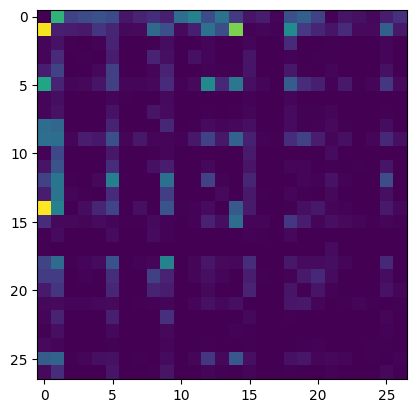

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [ ]:
N.shape

torch.Size([27, 27])

In [ ]:
N[0, :]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [ ]:
p = N[0].float()
p

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])

In [ ]:
# Normalize
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
itos = {i:s for s,i in stoi.items()}

In [ ]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [ ]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [ ]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
P = N.float()
P = P / P.sum(1, keepdim=True)

In [ ]:
P.shape

torch.Size([27, 27])

In [ ]:
torch.multinomial(P[0], num_samples=1, replacement=True, generator=g).item()

26

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  ix = 0
  while True:

    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break

  print(''.join(out))

junide.
janasah.
p.
cony.
a.


# Gradient Based Learning

In [ ]:
import torch.nn.functional as F

xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]

    xs.append(ix1)
    ys.append(ix2)

# Input Dataset
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f"Number of examples {num}")

# Initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

Number of examples 228146


In [ ]:
# Gradient Descent

epochs = 100
learning_rate = -50.0

for i in range(epochs):
  # Forward Pass
  xenc = F.one_hot(xs, num_classes=27).float()
  logits = (xenc @ W)
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdims=True)
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01 *(W**2).mean()

  # Backward pass
  W.grad = None # Set gradient to 0
  loss.backward()

  # Update the weights
  W.data += learning_rate * W.grad
  print(f"Epoch: {i}, loss: {loss}")


Epoch: 0, loss: 3.7686190605163574
Epoch: 1, loss: 3.3788065910339355
Epoch: 2, loss: 3.16109037399292
Epoch: 3, loss: 3.0271859169006348
Epoch: 4, loss: 2.9344842433929443
Epoch: 5, loss: 2.867231607437134
Epoch: 6, loss: 2.8166542053222656
Epoch: 7, loss: 2.777146339416504
Epoch: 8, loss: 2.7452542781829834
Epoch: 9, loss: 2.7188303470611572
Epoch: 10, loss: 2.696505546569824
Epoch: 11, loss: 2.6773719787597656
Epoch: 12, loss: 2.6608052253723145
Epoch: 13, loss: 2.6463515758514404
Epoch: 14, loss: 2.633664846420288
Epoch: 15, loss: 2.622471570968628
Epoch: 16, loss: 2.6125476360321045
Epoch: 17, loss: 2.6037068367004395
Epoch: 18, loss: 2.595794916152954
Epoch: 19, loss: 2.5886809825897217
Epoch: 20, loss: 2.5822560787200928
Epoch: 21, loss: 2.5764293670654297
Epoch: 22, loss: 2.5711236000061035
Epoch: 23, loss: 2.5662729740142822
Epoch: 24, loss: 2.5618228912353516
Epoch: 25, loss: 2.5577263832092285
Epoch: 26, loss: 2.5539441108703613
Epoch: 27, loss: 2.550442695617676
Epoch: 28, 

In [ ]:
# Sample from NN model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  ix = 0

  while True:

    # Before
    # p = P[ix]

    # Now
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = (xenc @ W)
    counts = logits.exp()
    p = counts / counts.sum(1, keepdims=True)

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cfay.
a.


# MultiLayer Perceptron

In [ ]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [ ]:
# Build Dataset
block_size = 3
X, Y = [], []

for w in words[:5]:
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [ ]:
# Inputs, Labels
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [ ]:
# embedding matrix for 27 examples
C = torch.randn((27, 2))
C

tensor([[-4.3502e-01, -9.5755e-01],
        [-7.1027e-01,  3.5312e-02],
        [-2.3874e-02,  2.9436e-01],
        [ 1.5712e+00, -5.8221e-01],
        [ 9.0121e-01, -6.7264e-01],
        [ 1.4042e+00,  4.8186e-01],
        [-7.1864e-01,  2.4264e-01],
        [-1.2834e-01, -1.9364e-01],
        [-8.2290e-01,  7.6994e-01],
        [ 1.6183e+00, -6.3312e-02],
        [-7.4102e-01, -6.8132e-01],
        [ 7.2188e-01, -5.6925e-01],
        [ 4.2605e-01,  1.0891e+00],
        [ 6.6722e-02,  3.1414e+00],
        [-4.8796e-01, -5.0744e-01],
        [-3.5421e-01, -6.6542e-01],
        [ 2.2274e-01, -6.7127e-01],
        [-4.4113e-02, -1.3908e-04],
        [ 1.0312e-01,  5.2329e-02],
        [-8.6890e-01, -8.0186e-02],
        [-1.0783e+00,  3.4289e-01],
        [ 2.6808e-01,  9.6747e-01],
        [-2.2250e-01, -7.2056e-01],
        [-7.6364e-01, -2.9052e-01],
        [ 9.0675e-01, -8.1730e-01],
        [ 1.5583e+00, -2.1213e+00],
        [ 4.4860e-01, -1.3393e+00]])

In [ ]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([1.4042, 0.4819])

In [ ]:
C[5]

tensor([1.4042, 0.4819])

In [ ]:
embeddings = C[X]

In [ ]:
embeddings.view(32, 6)

tensor([[-0.4350, -0.9576, -0.4350, -0.9576, -0.4350, -0.9576],
        [-0.4350, -0.9576, -0.4350, -0.9576,  1.4042,  0.4819],
        [-0.4350, -0.9576,  1.4042,  0.4819,  0.0667,  3.1414],
        [ 1.4042,  0.4819,  0.0667,  3.1414,  0.0667,  3.1414],
        [ 0.0667,  3.1414,  0.0667,  3.1414, -0.7103,  0.0353],
        [-0.4350, -0.9576, -0.4350, -0.9576, -0.4350, -0.9576],
        [-0.4350, -0.9576, -0.4350, -0.9576, -0.3542, -0.6654],
        [-0.4350, -0.9576, -0.3542, -0.6654,  0.4260,  1.0891],
        [-0.3542, -0.6654,  0.4260,  1.0891,  1.6183, -0.0633],
        [ 0.4260,  1.0891,  1.6183, -0.0633, -0.2225, -0.7206],
        [ 1.6183, -0.0633, -0.2225, -0.7206,  1.6183, -0.0633],
        [-0.2225, -0.7206,  1.6183, -0.0633, -0.7103,  0.0353],
        [-0.4350, -0.9576, -0.4350, -0.9576, -0.4350, -0.9576],
        [-0.4350, -0.9576, -0.4350, -0.9576, -0.7103,  0.0353],
        [-0.4350, -0.9576, -0.7103,  0.0353, -0.2225, -0.7206],
        [-0.7103,  0.0353, -0.2225, -0.7

In [ ]:
# Build Dataset
def build_dataset(words):
  block_size = 3
  X, Y = [], []

  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y


import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])
11897


In [ ]:
n_embeddings = 10
n_hidden = 200

# Initialization
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, n_embeddings), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

num_parameters = sum(p.nelement() for p in parameters)
print(num_parameters)
for p in parameters:
  p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [2]:
lri = []
lossi = []
steps = []

In [ ]:

for i in range(30000):

  ix = torch.randint(0, Xtr.shape[0], (32,))

  # Forward Pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
  logits = h @ W2 + b2
  # counts = logits.exp()
  # prob = counts / counts.sum(1, keepdims=True)
  # loss = -prob[torch.arange(32), Y].log().mean()
  loss = F.cross_entropy(logits, Ytr[ix])

  # Backward Pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  lri.append(lr)
  lossi.append(loss.item())
  steps.append(i)

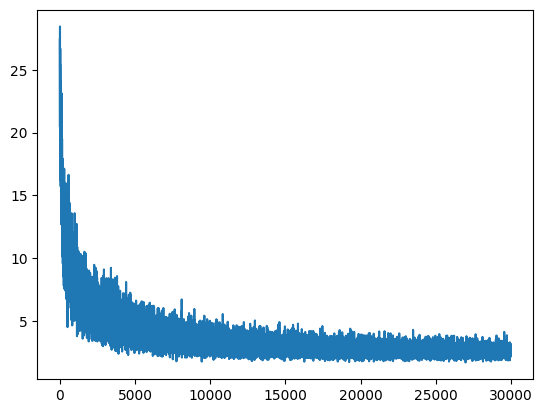

In [ ]:
plt.plot(steps, lossi)

In [ ]:
loss

tensor(2.6089, grad_fn=<NllLossBackward0>)

In [ ]:
# Finding loss on dev dataset
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.5436, grad_fn=<NllLossBackward0>)

In [ ]:
# Sample from NN model
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
  out = []
  context = [0] * block_size

  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)

    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]

    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))

junndekiana.
adhu.
cora.
adin.
moutnitolewa.
juem.
adahnad.
zamilenhai.
dedailroi.
madsniy.
